In [1]:
# импортируем необходимые библиотеки, классы и функции
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
%config InlineBackend.figure_format = 'retina'

In [2]:
# загружаем данные
df = pd.read_csv('Data/co2-ppm-daily_csv.csv')
# переводим в формат, который требует Prophet
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

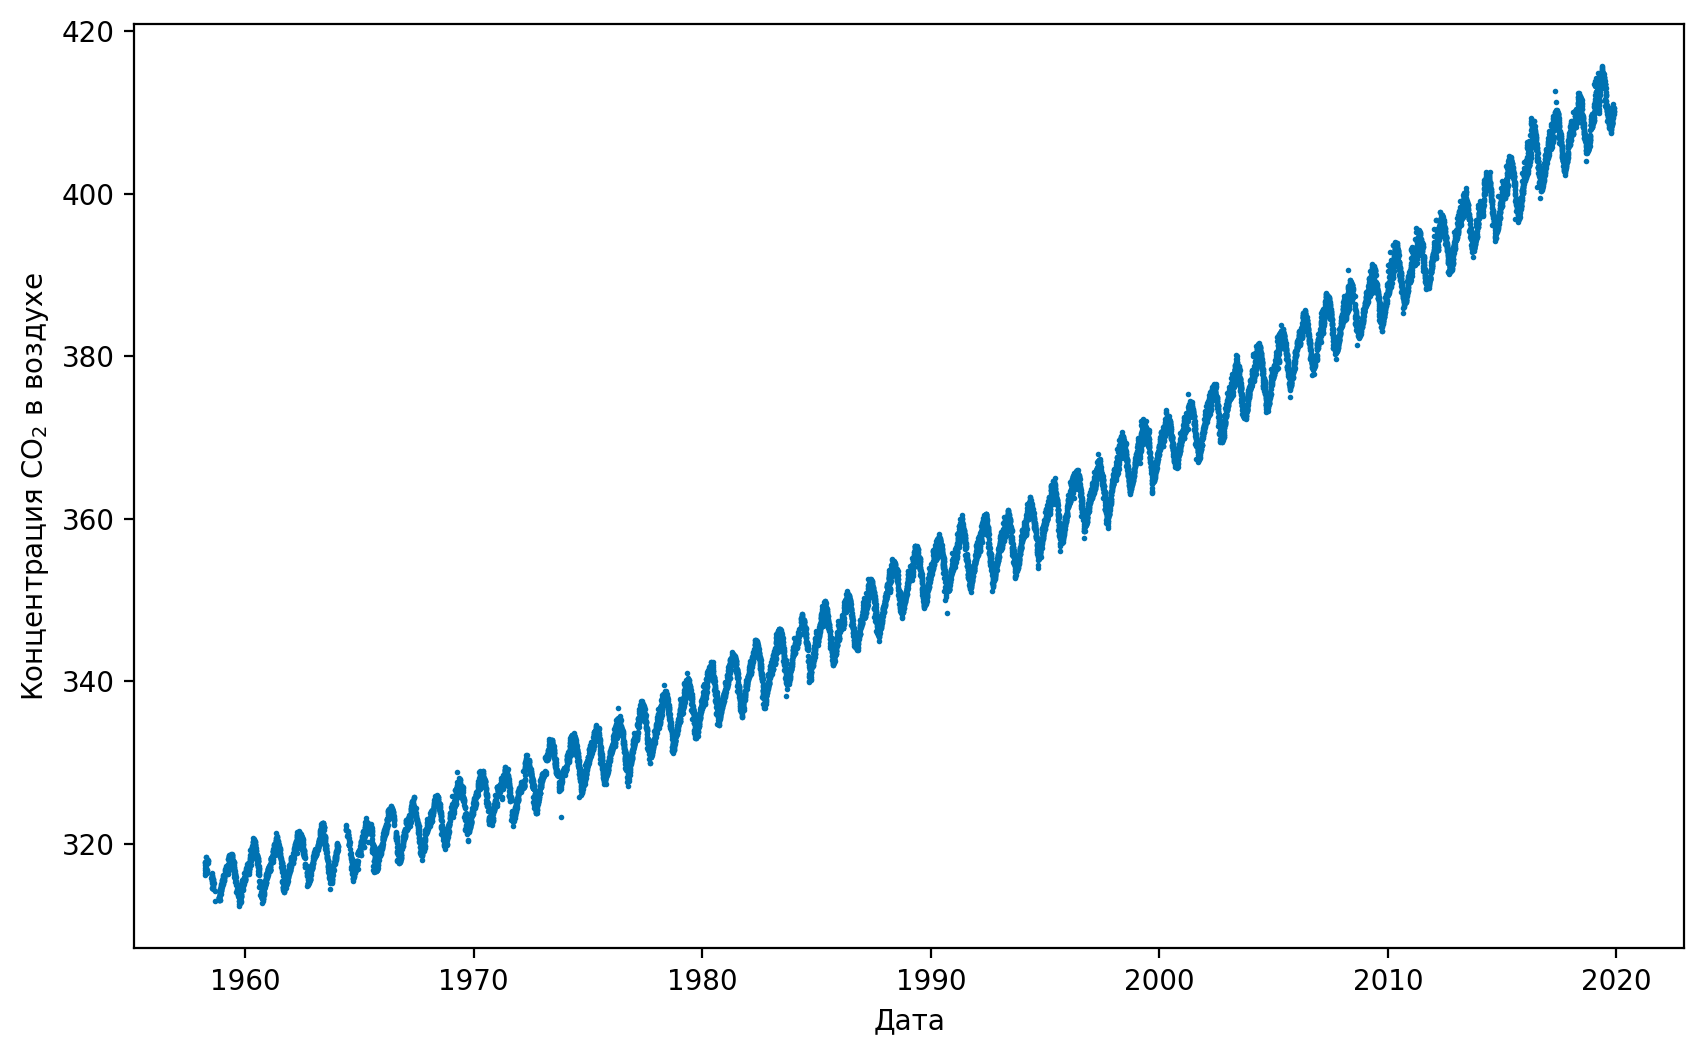

In [3]:
# визуализируем ряд
plt.figure(figsize=(10, 6))
plt.scatter(pd.to_datetime(df['ds']), 
            df['y'], 
            s=1, 
            c='#0072B2')
plt.xlabel('Дата')
plt.ylabel(r'Концентрация CO$_2$ в воздухе')
plt.show()

In [4]:
# создаем модель Prophet
model = Prophet()
# обучаем модель Prophet
model.fit(df);

21:29:08 - cmdstanpy - INFO - Chain [1] start processing
21:29:24 - cmdstanpy - INFO - Chain [1] done processing


In [5]:
# получаем удлиненный датафрейм, задав горизонт 
# прогнозирования - 3650 дней (10 лет)
future = model.make_future_dataframe(periods=365 * 10)
future

,ds
0,1958-03-30
1,1958-03-31
2,1958-04-02
3,1958-04-03
4,1958-04-04
...,...
23032,2029-11-16
23033,2029-11-17
23034,2029-11-18
23035,2029-11-19


In [6]:
# получаем прогнозы
forecast = model.predict(future)

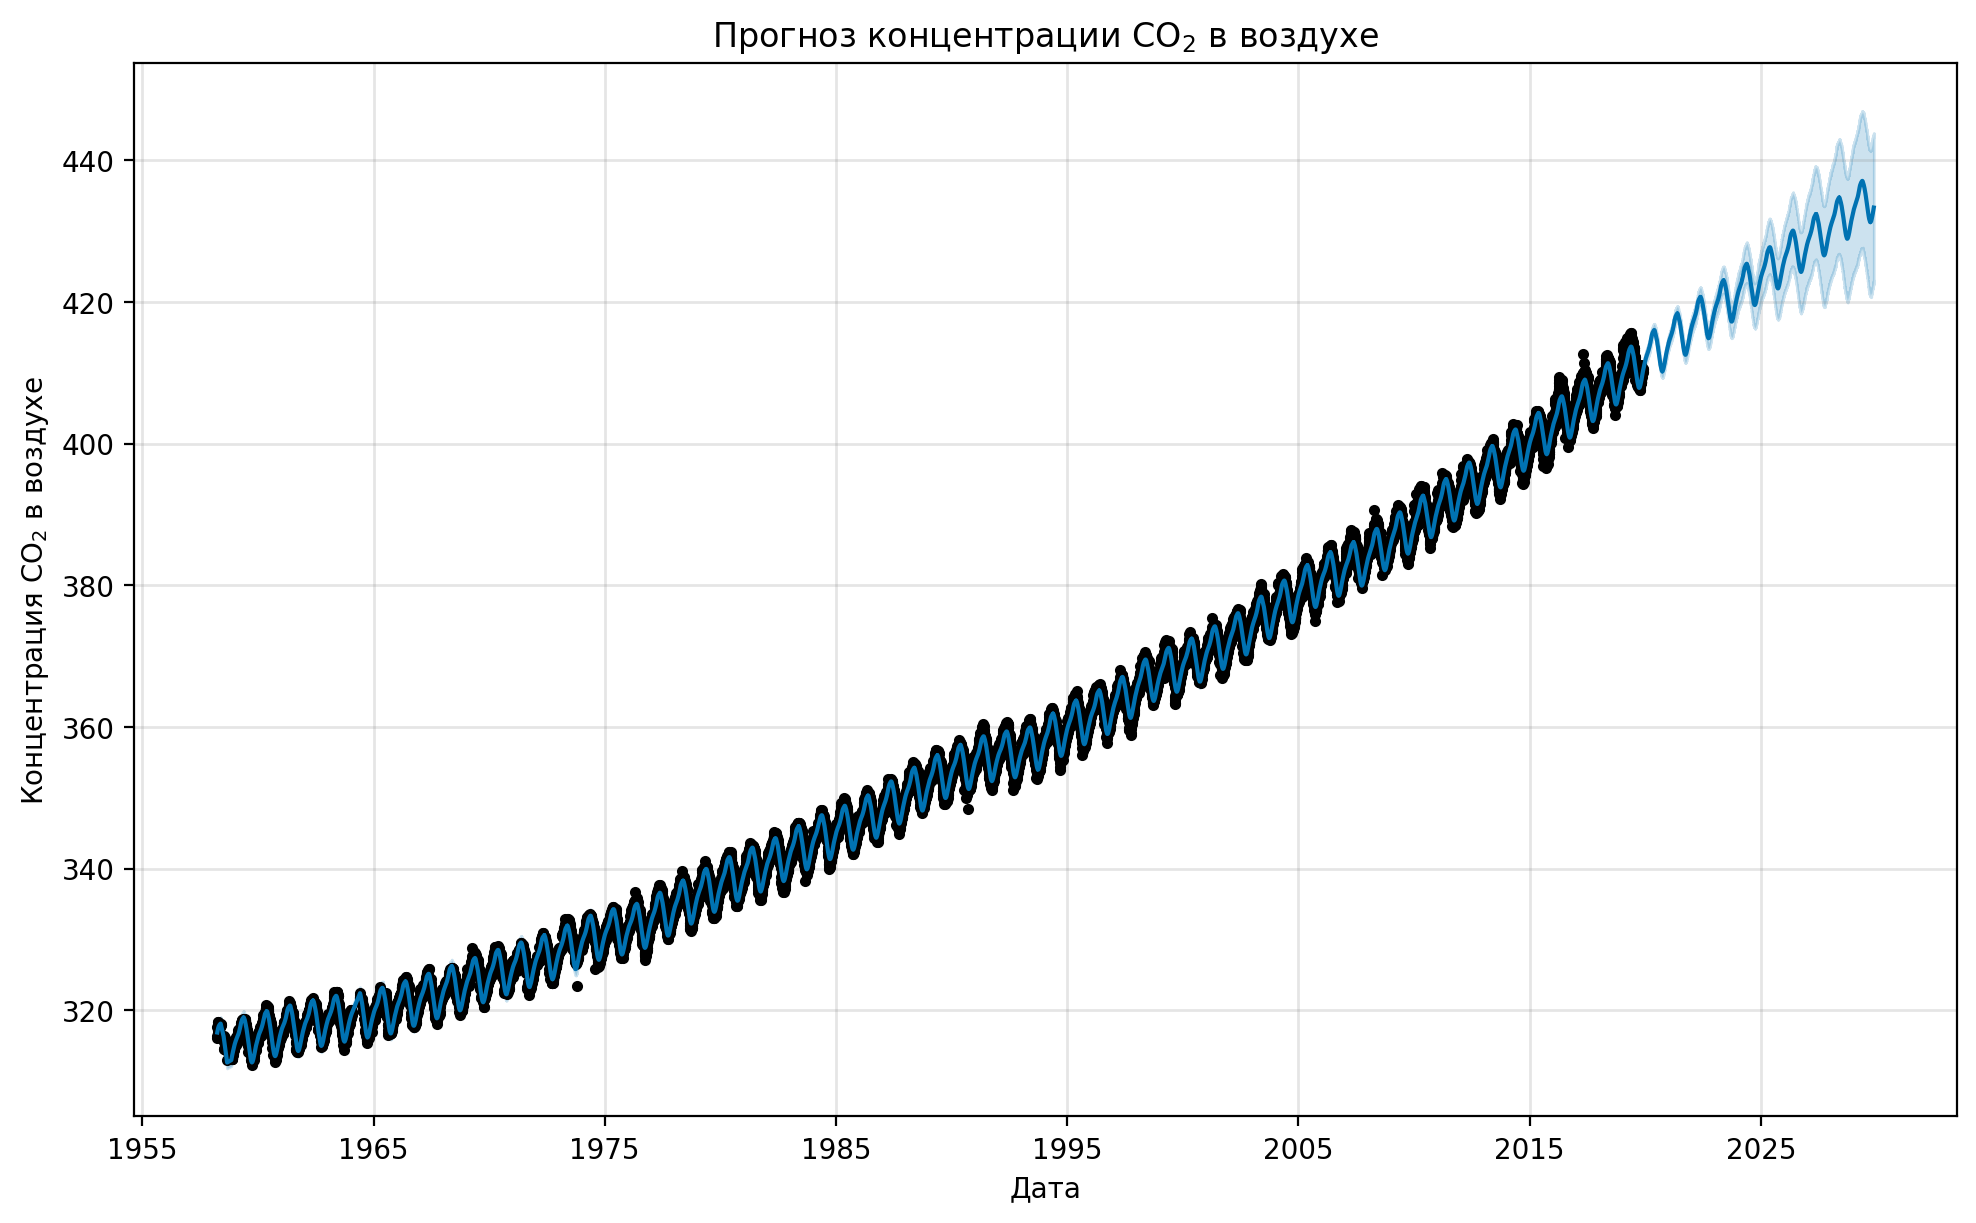

In [7]:
# визуализируем прогнозы
fig = model.plot(forecast,
                 xlabel='Дата', 
                 ylabel=r'Концентрация CO$_2$ в воздухе')
plt.title('Прогноз концентрации CO$_2$ в воздухе')
plt.show()

In [8]:
# смотрим первые 3 прогноза
forecast.head(3).T

,0,1,2
ds,1958-03-30 00:00:00,1958-03-31 00:00:00,1958-04-02 00:00:00
trend,314.881382,314.883786,314.888592
yhat_lower,315.940417,316.063237,316.244526
yhat_upper,317.699472,317.71667,317.811981
trend_lower,314.881382,314.883786,314.888592
trend_upper,314.881382,314.883786,314.888592
additive_terms,1.985651,2.015767,2.118735
additive_terms_lower,1.985651,2.015767,2.118735
additive_terms_upper,1.985651,2.015767,2.118735
weekly,0.003214,-0.010712,0.003358


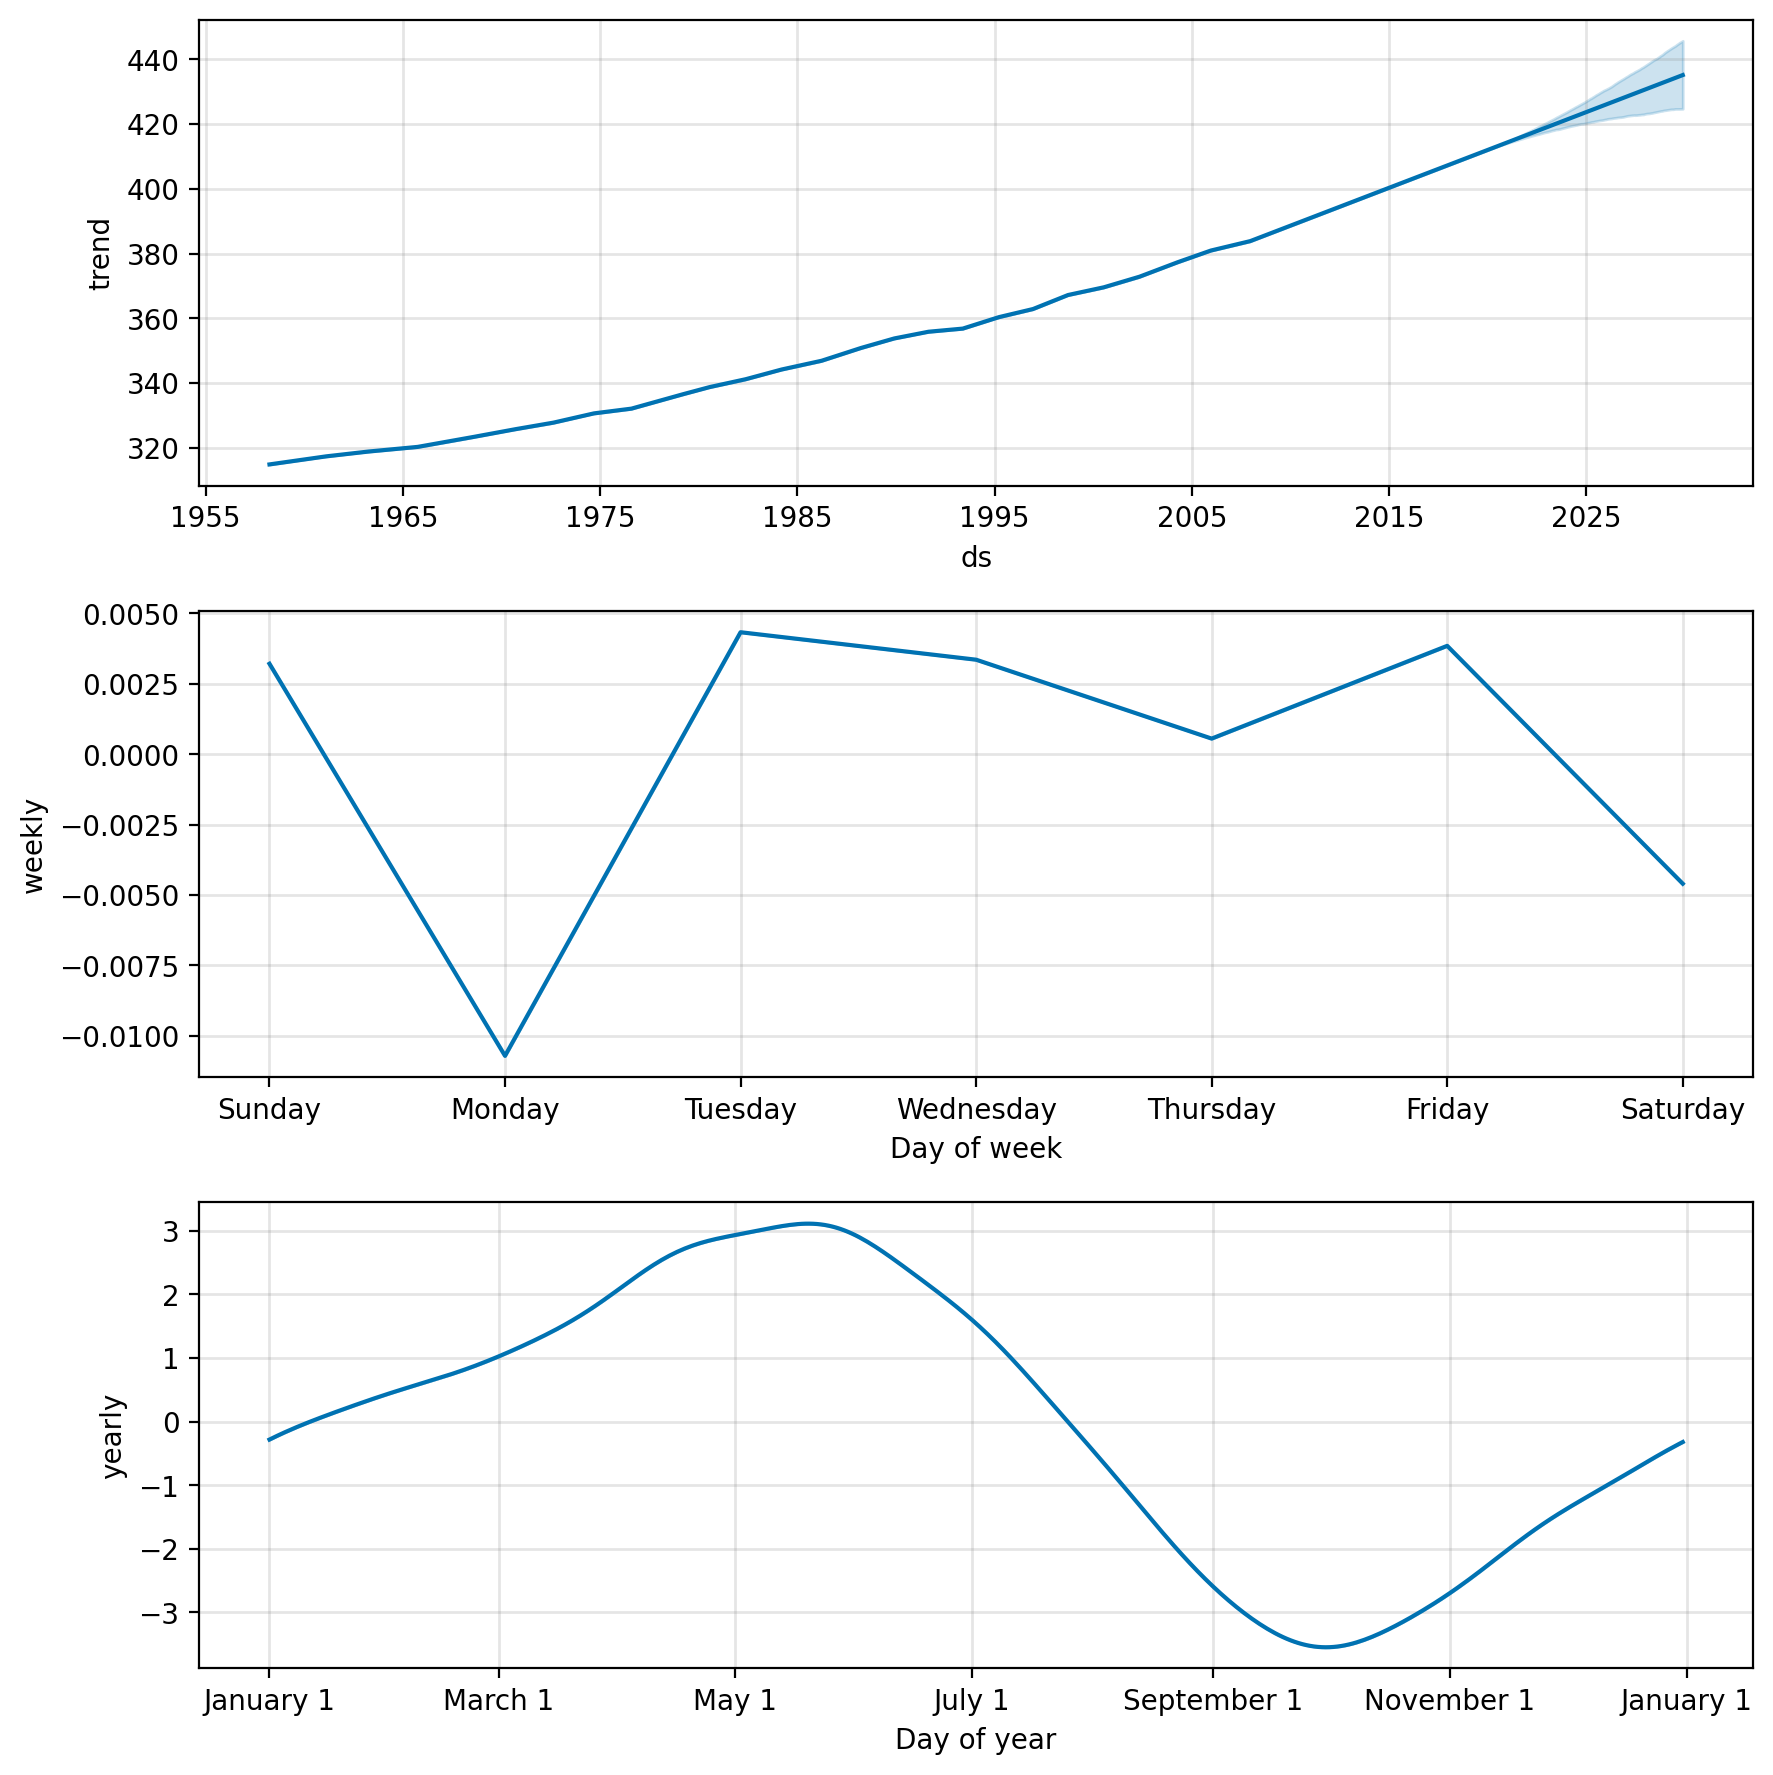

In [9]:
# смотрим компоненты прогнозов
fig2 = model.plot_components(forecast)
plt.show()

In [10]:
# загружаем данные об авиапассажирах
df = pd.read_csv('Data/AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.columns = ['ds', 'y']
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


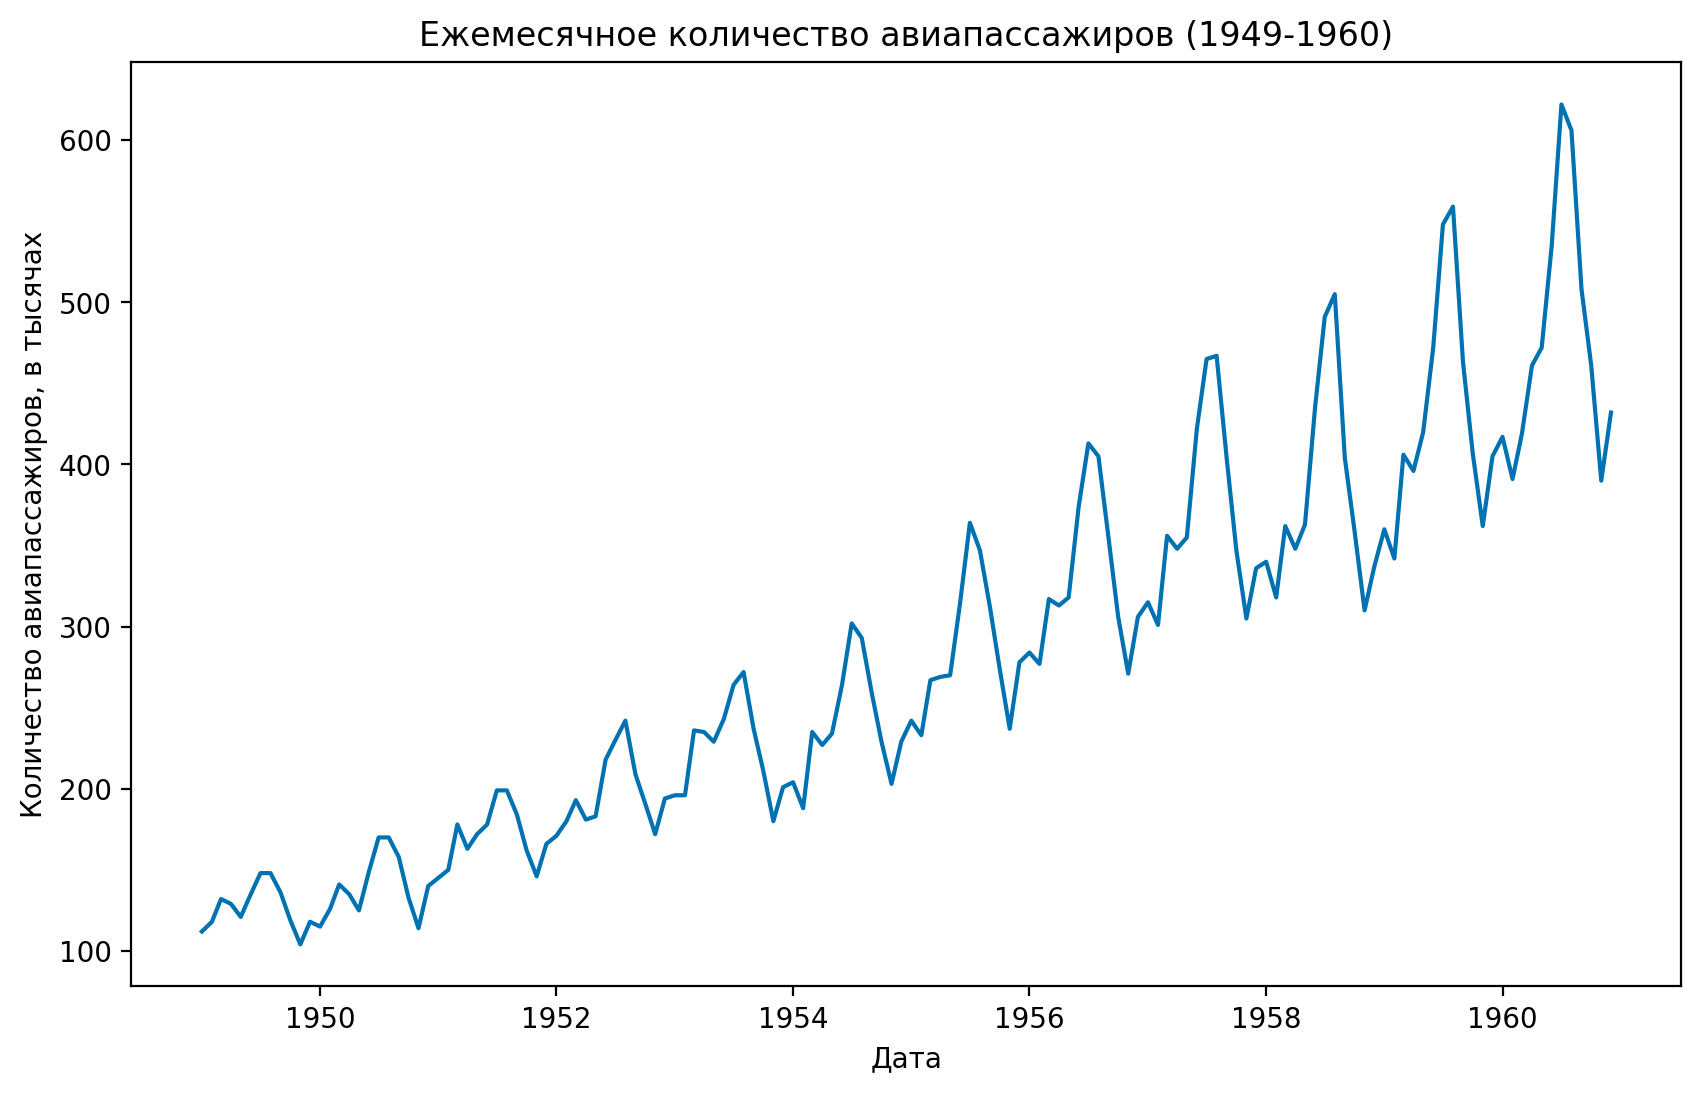

In [11]:
# визуализируем ряд
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(df['ds']), 
         df['y'], 
         c='#0072B2')
plt.xlabel('Дата')
plt.ylabel('Количество авиапассажиров, в тысячах')
plt.title('Ежемесячное количество авиапассажиров (1949-1960)')
plt.show()

21:29:33 - cmdstanpy - INFO - Chain [1] start processing
21:29:33 - cmdstanpy - INFO - Chain [1] done processing


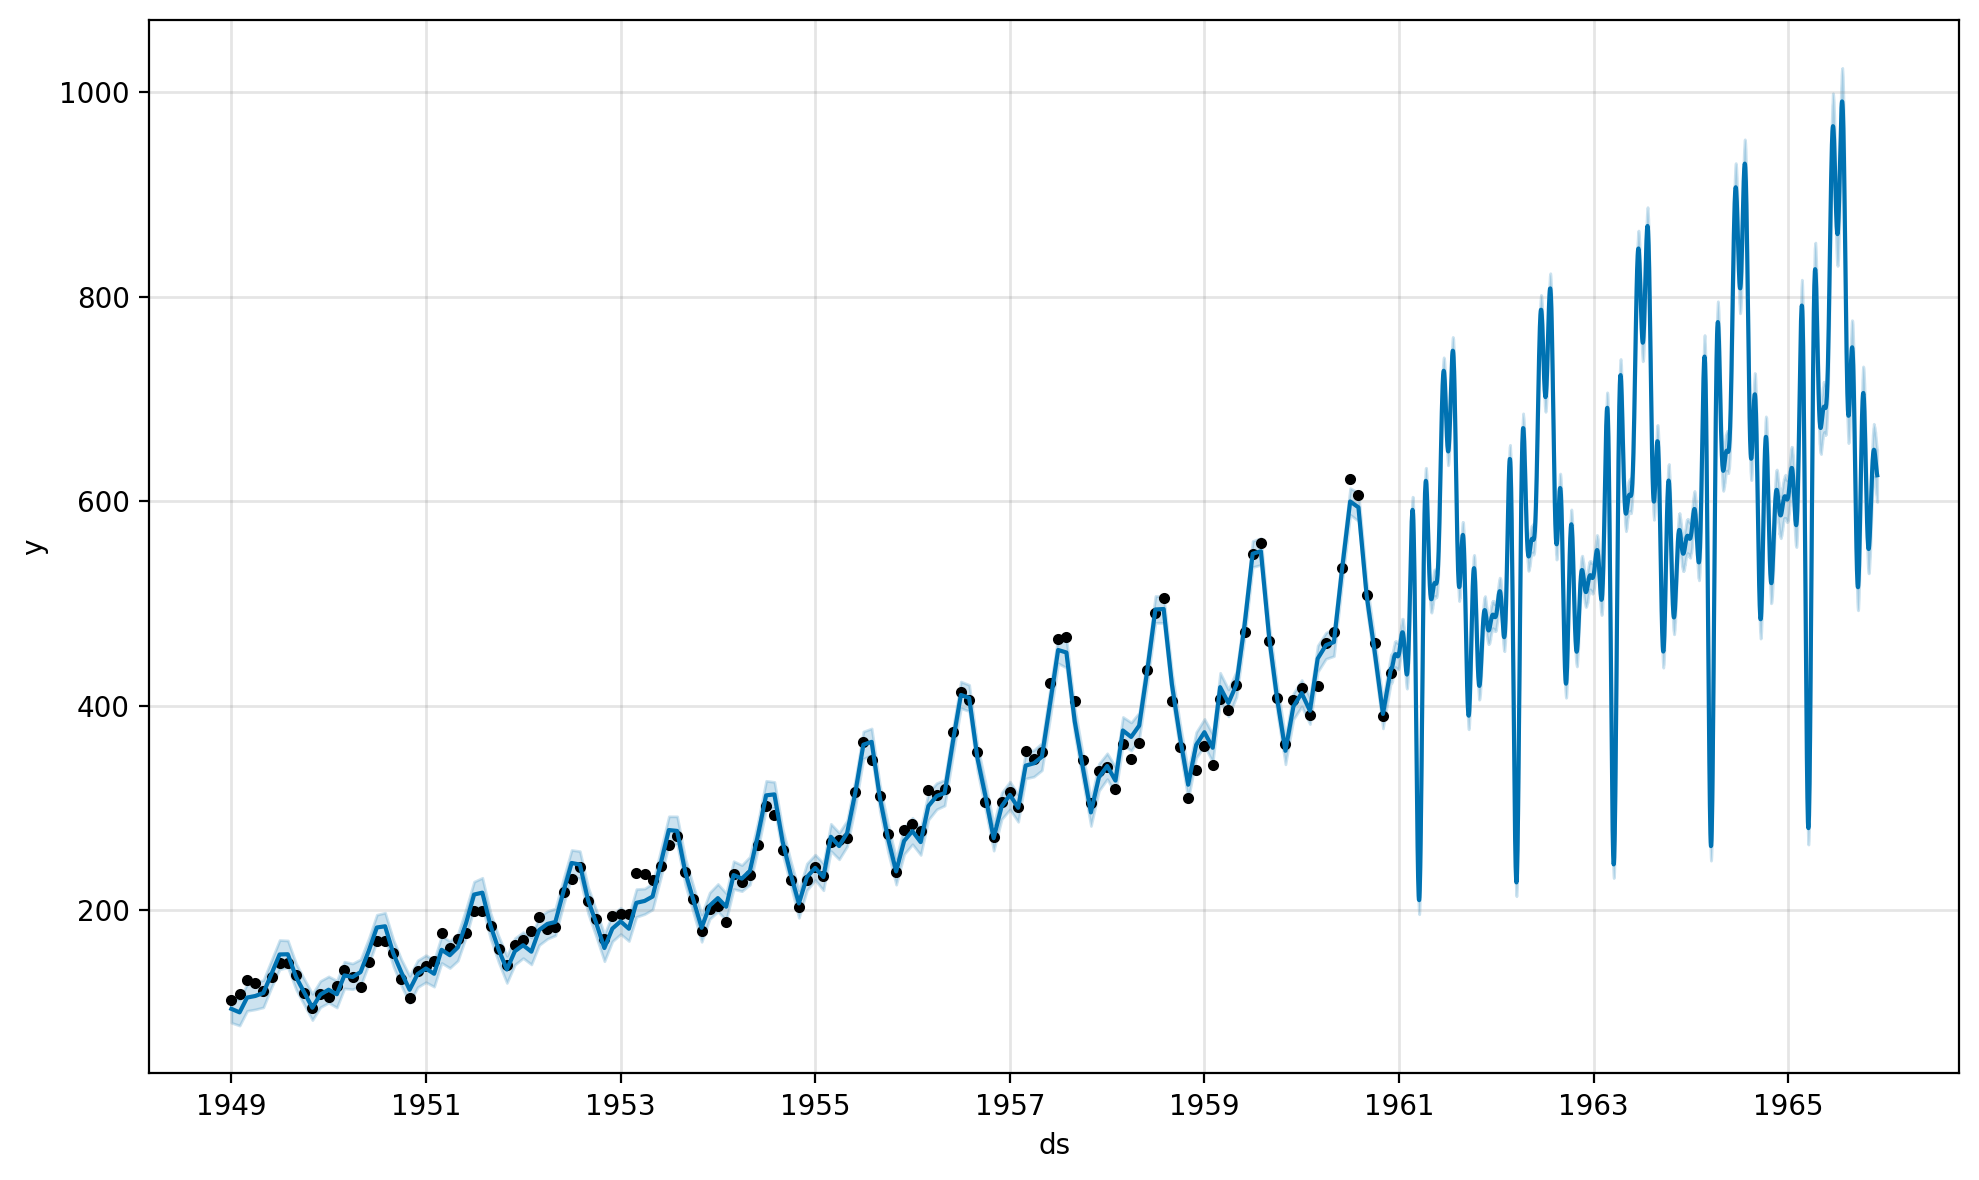

In [12]:
# создаем модель, указав мультипликативную сезонность
model = Prophet(seasonality_mode='multiplicative')
# обучаем модель
model.fit(df)
# получаем удлиненный датафрейм, задав горизонт
# прогнозирования - 1825 дней (5 лет)
future = model.make_future_dataframe(periods=365 * 5)
# получаем прогнозы
forecast = model.predict(future)
# визуализируем прогнозы
fig = model.plot(forecast)
plt.show()

21:29:35 - cmdstanpy - INFO - Chain [1] start processing
21:29:35 - cmdstanpy - INFO - Chain [1] done processing


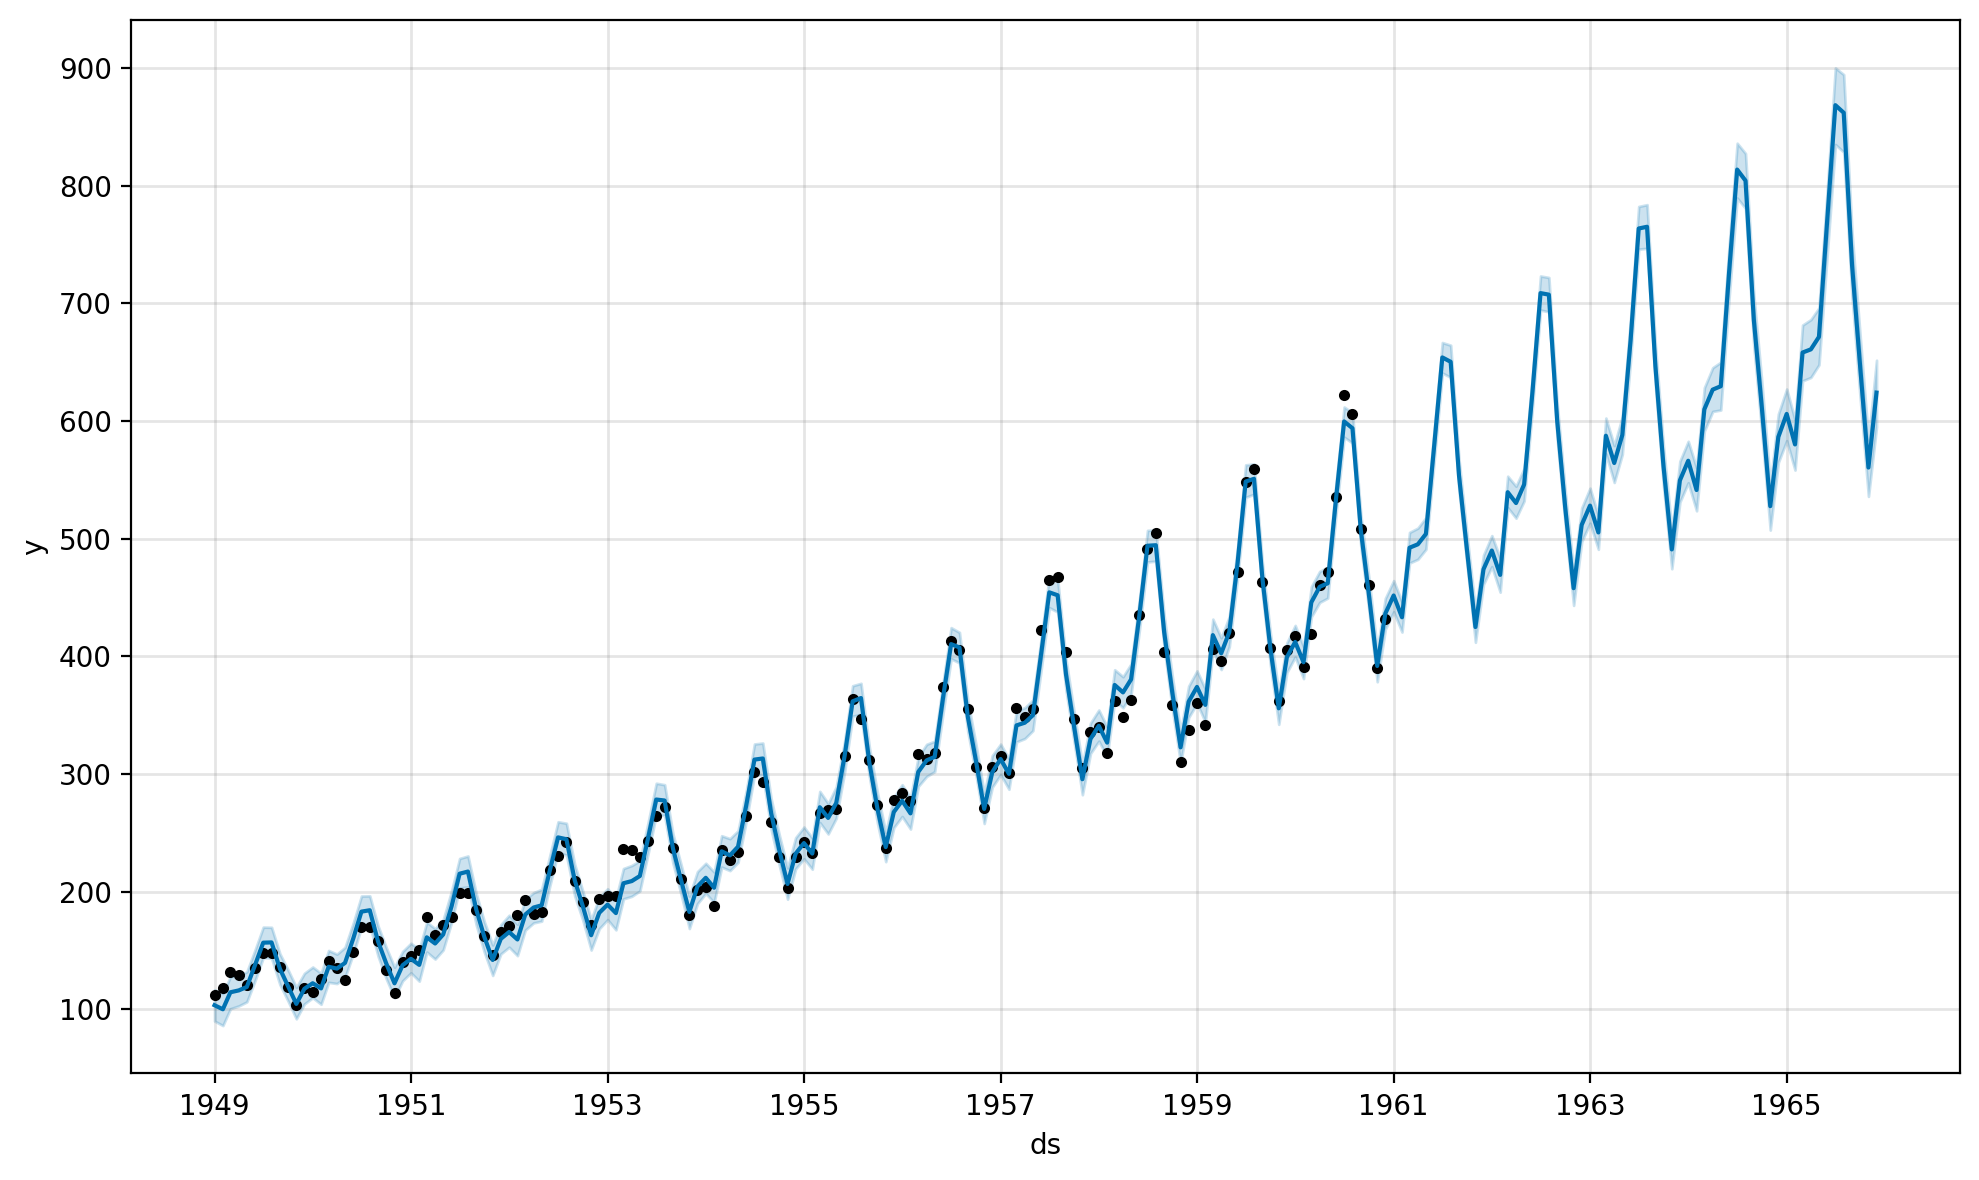

In [13]:
# создаем модель, указав мультипликативную сезонность
model = Prophet(seasonality_mode='multiplicative')
# обучаем модель
model.fit(df)
# получаем удлиненный датафрейм, задав горизонт
# прогнозирования - 60 месяцев (5 лет)
future = model.make_future_dataframe(periods=12 * 5,
                                     freq='MS')
# получаем прогнозы
forecast = model.predict(future)
# визуализируем прогнозы
fig = model.plot(forecast)
plt.show()

In [14]:
# загружаем данные о поездках на велосипедах
data = pd.read_csv('Data/divvy_hourly.csv')
df = pd.DataFrame({'ds': pd.to_datetime(data['date']),
                   'y': data['rides']})

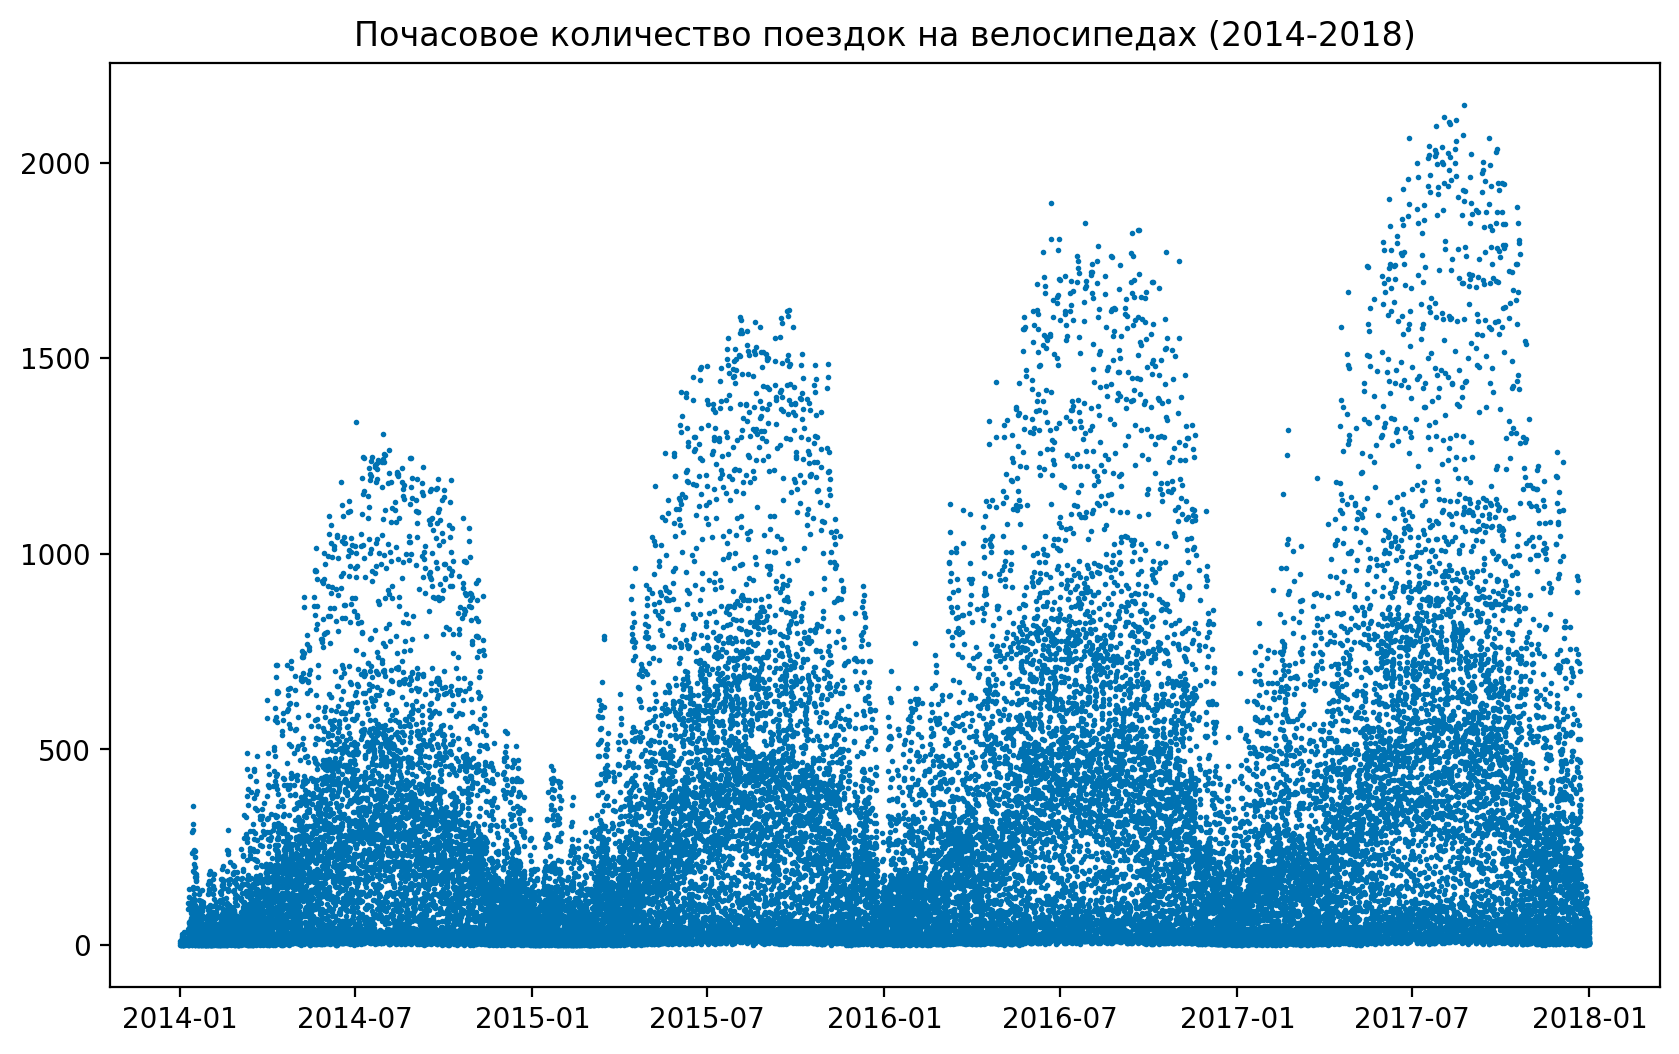

In [15]:
# визуализируем ряд
plt.figure(figsize=(10, 6))
plt.scatter(x=df['ds'], y=df['y'], s=1, c='#0072B2')
plt.title('Почасовое количество поездок на велосипедах (2014-2018)')
plt.show()

21:29:41 - cmdstanpy - INFO - Chain [1] start processing
21:30:03 - cmdstanpy - INFO - Chain [1] done processing


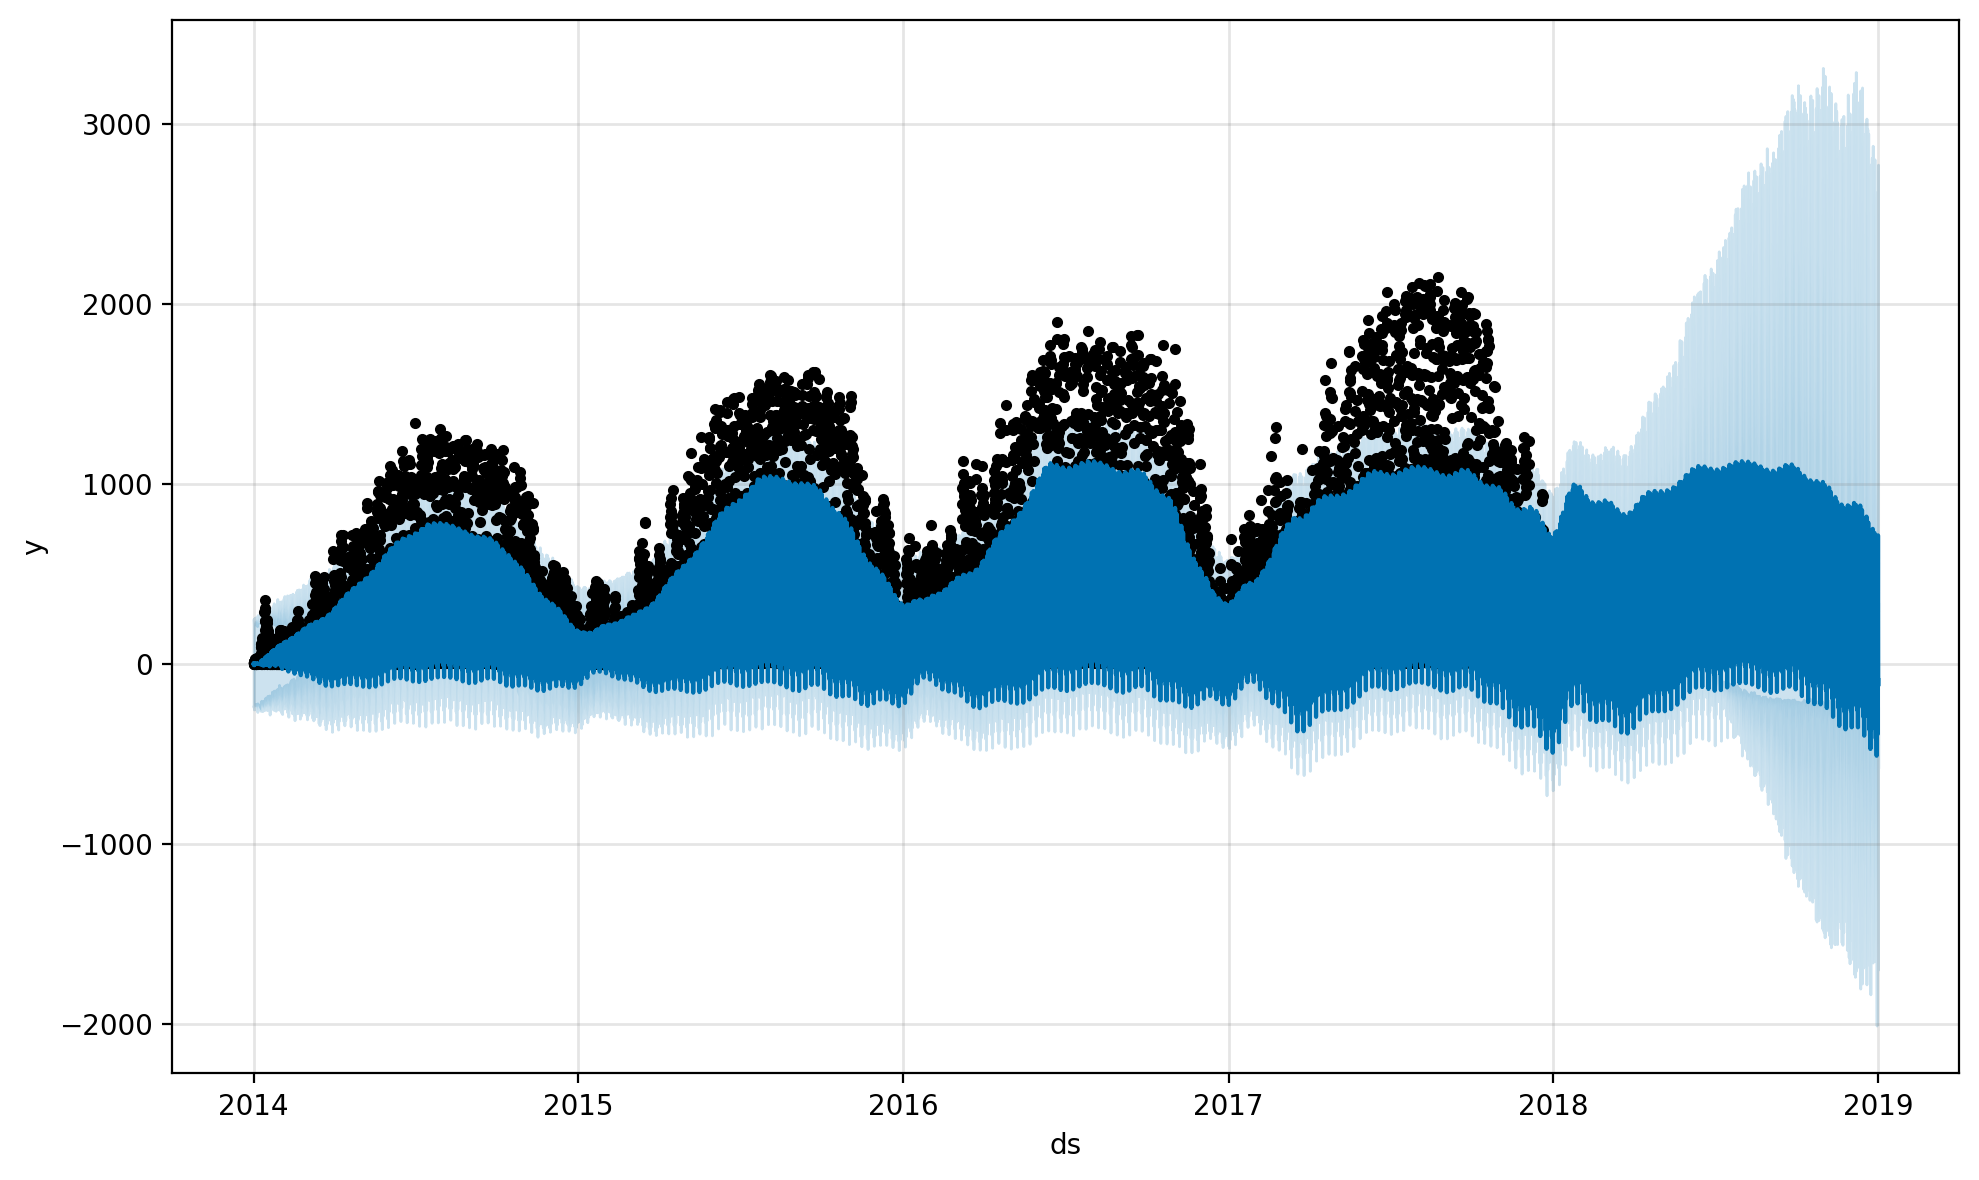

In [16]:
# создаем модель, указав мультипликативную сезонность
model = Prophet(seasonality_mode='multiplicative')
# обучаем модель
model.fit(df)
# получаем удлиненный датафрейм, задав горизонт
# прогнозирования - 8760 часов (1 год)
future = model.make_future_dataframe(periods=365 * 24, freq='h')
# получаем прогнозы
forecast = model.predict(future)
# визуализируем прогнозы
fig = model.plot(forecast)
plt.show()

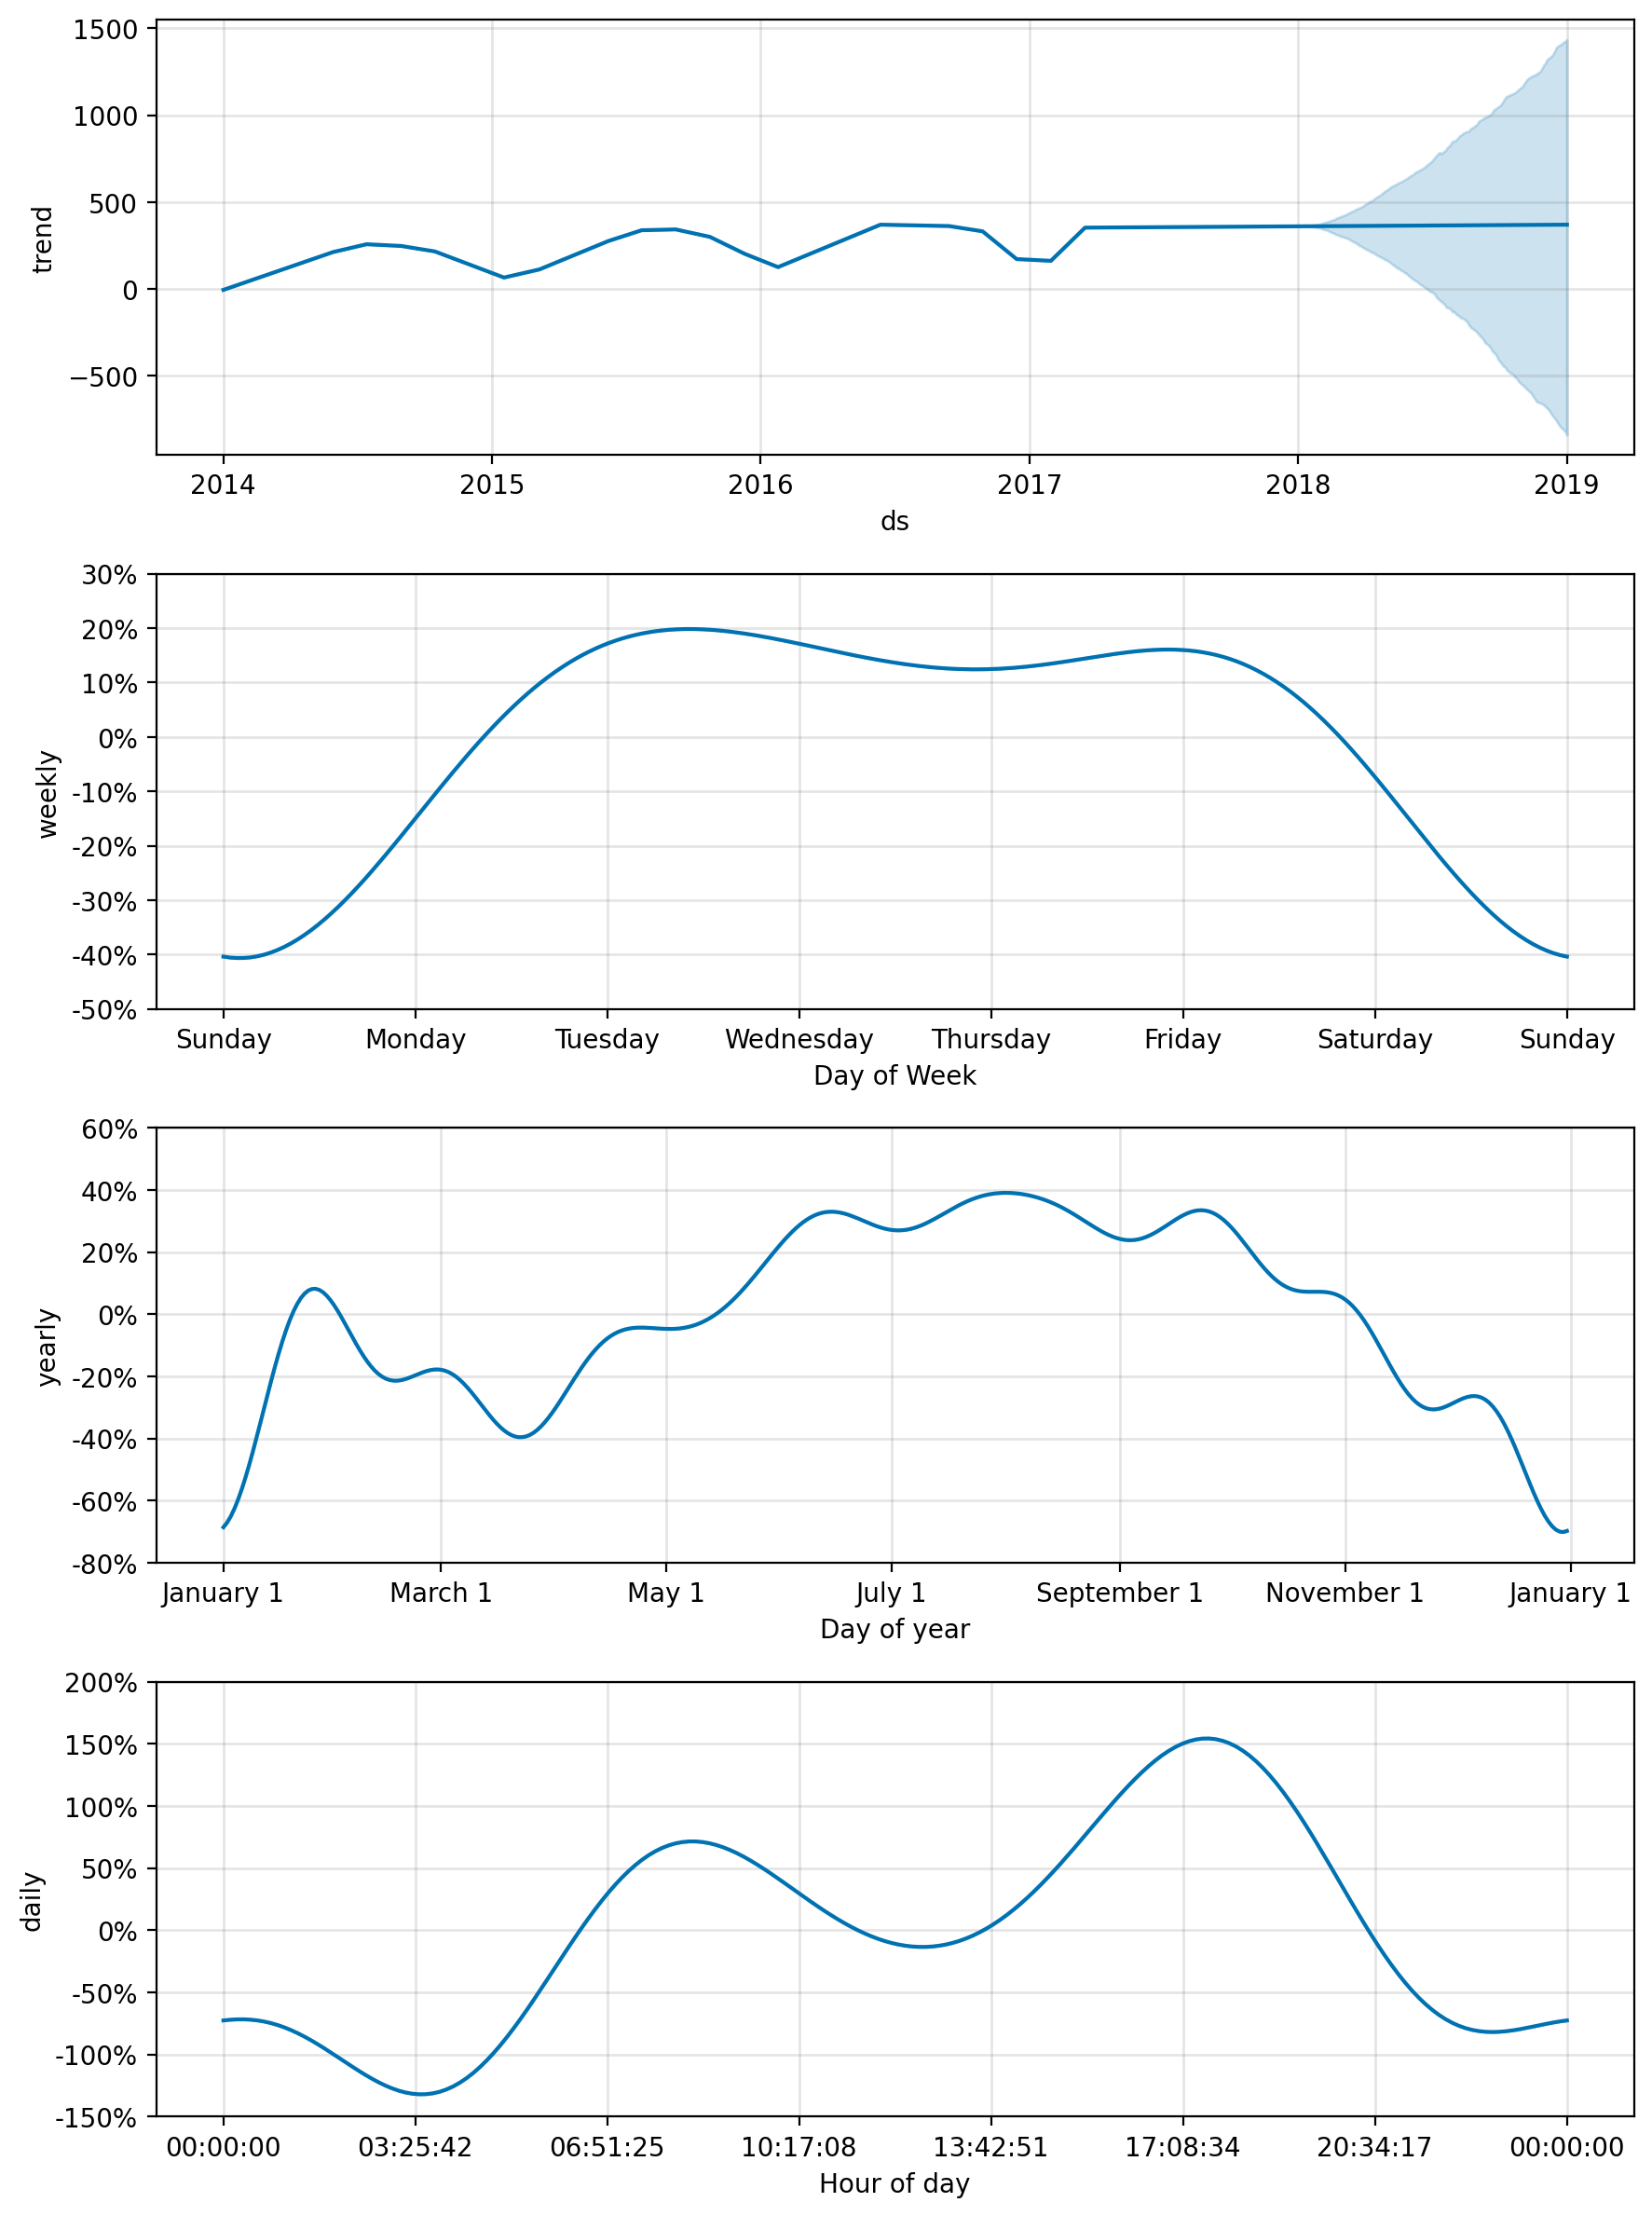

In [17]:
# смотрим компоненты прогнозов
fig2 = model.plot_components(forecast)
plt.show()

In [18]:
# модифицирируем данные
df = df[(df['ds'].dt.hour >= 8) & (df['ds'].dt.hour < 18)]

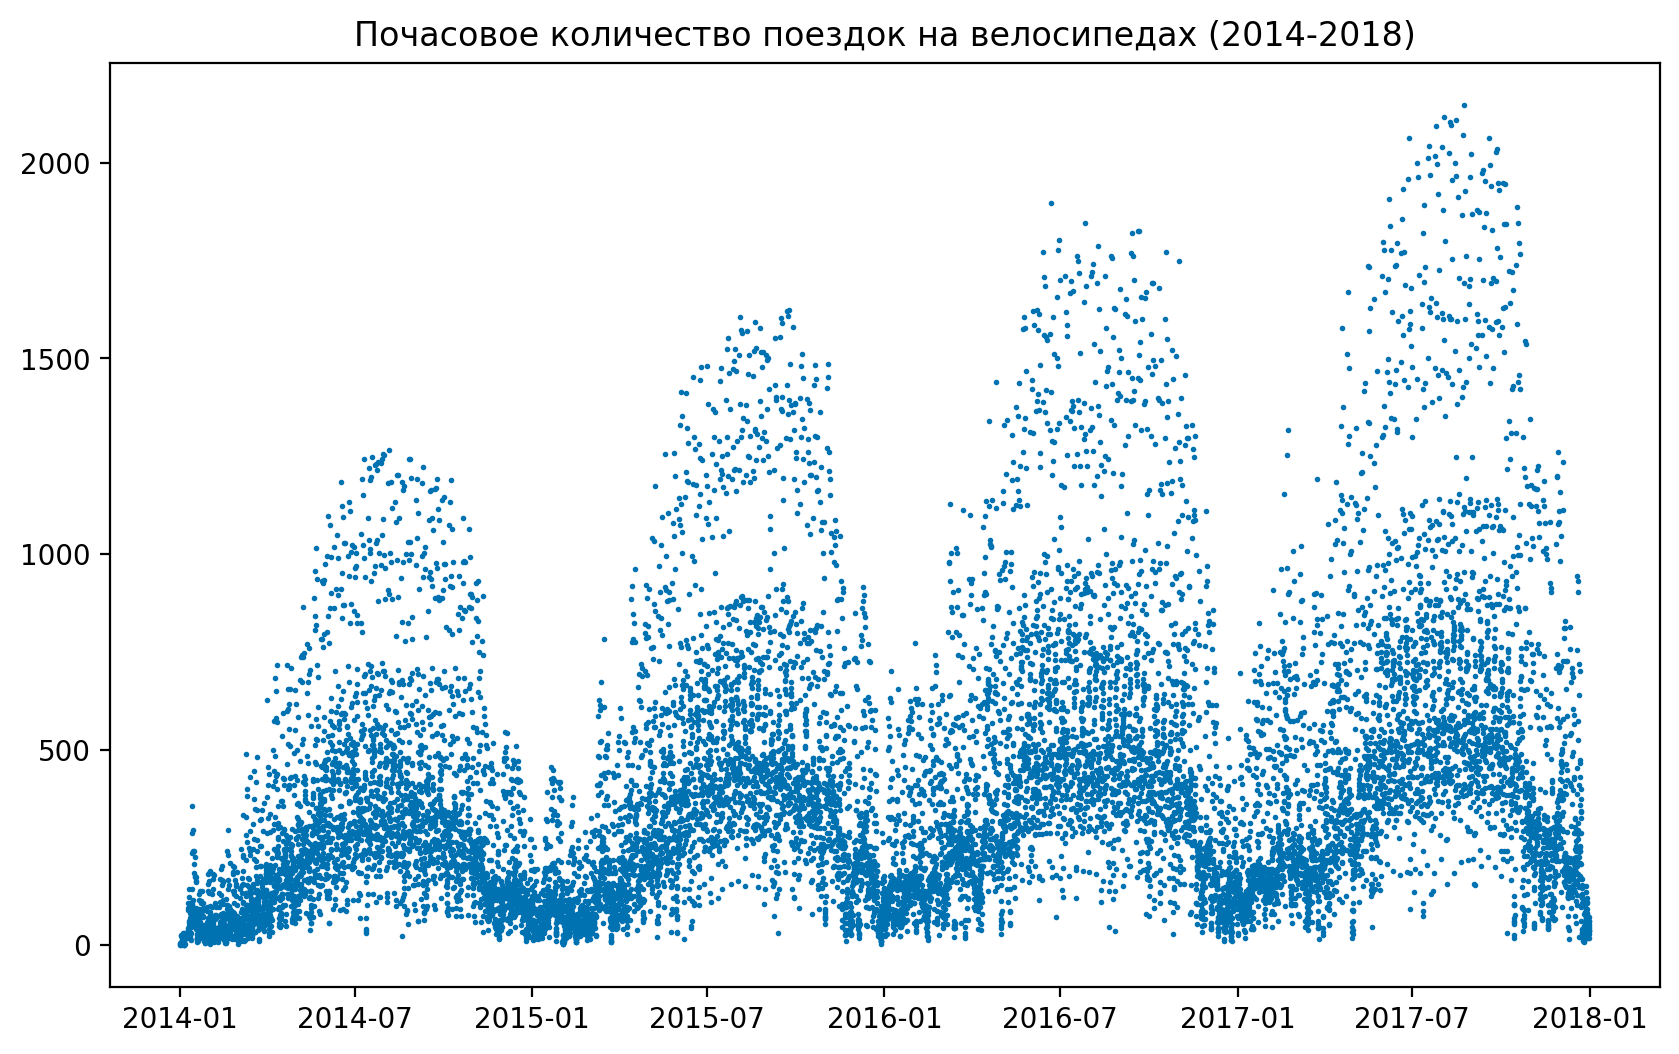

In [19]:
# визуализируем ряд
plt.figure(figsize=(10, 6))
plt.scatter(x=df['ds'], y=df['y'], s=1, c='#0072B2')
plt.title('Почасовое количество поездок на велосипедах (2014-2018)')
plt.show()

21:30:20 - cmdstanpy - INFO - Chain [1] start processing
21:30:37 - cmdstanpy - INFO - Chain [1] done processing


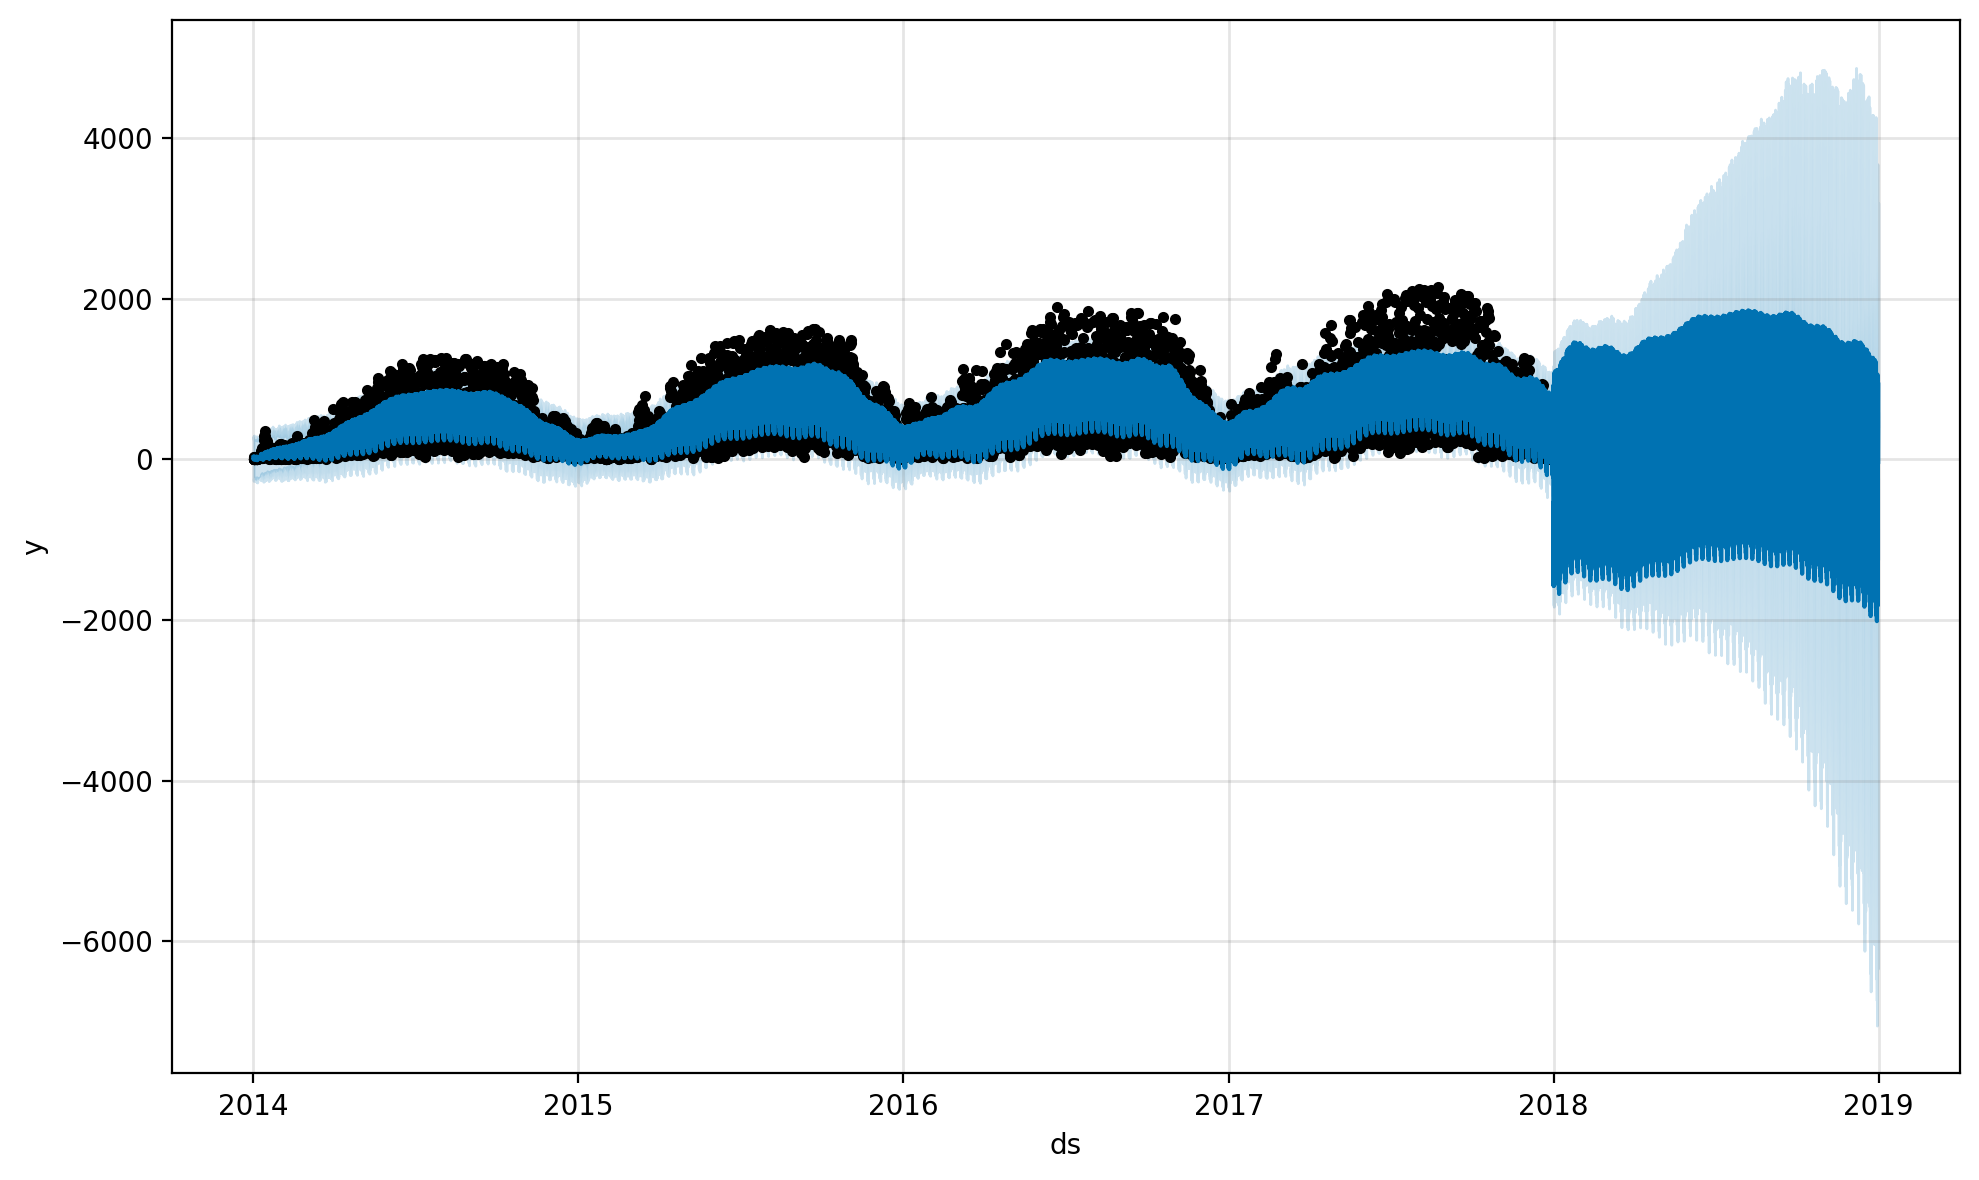

In [20]:
# создаем модель, указав мультипликативную сезонность
model = Prophet(seasonality_mode='multiplicative')
# обучаем модель
model.fit(df)
# получаем удлиненный датафрейм, задав горизонт
# прогнозирования - 8760 часов (1 год)
future = model.make_future_dataframe(periods=365 * 24, freq='h')
# получаем прогнозы
forecast = model.predict(future)
# визуализируем прогнозы
fig = model.plot(forecast)
plt.show()

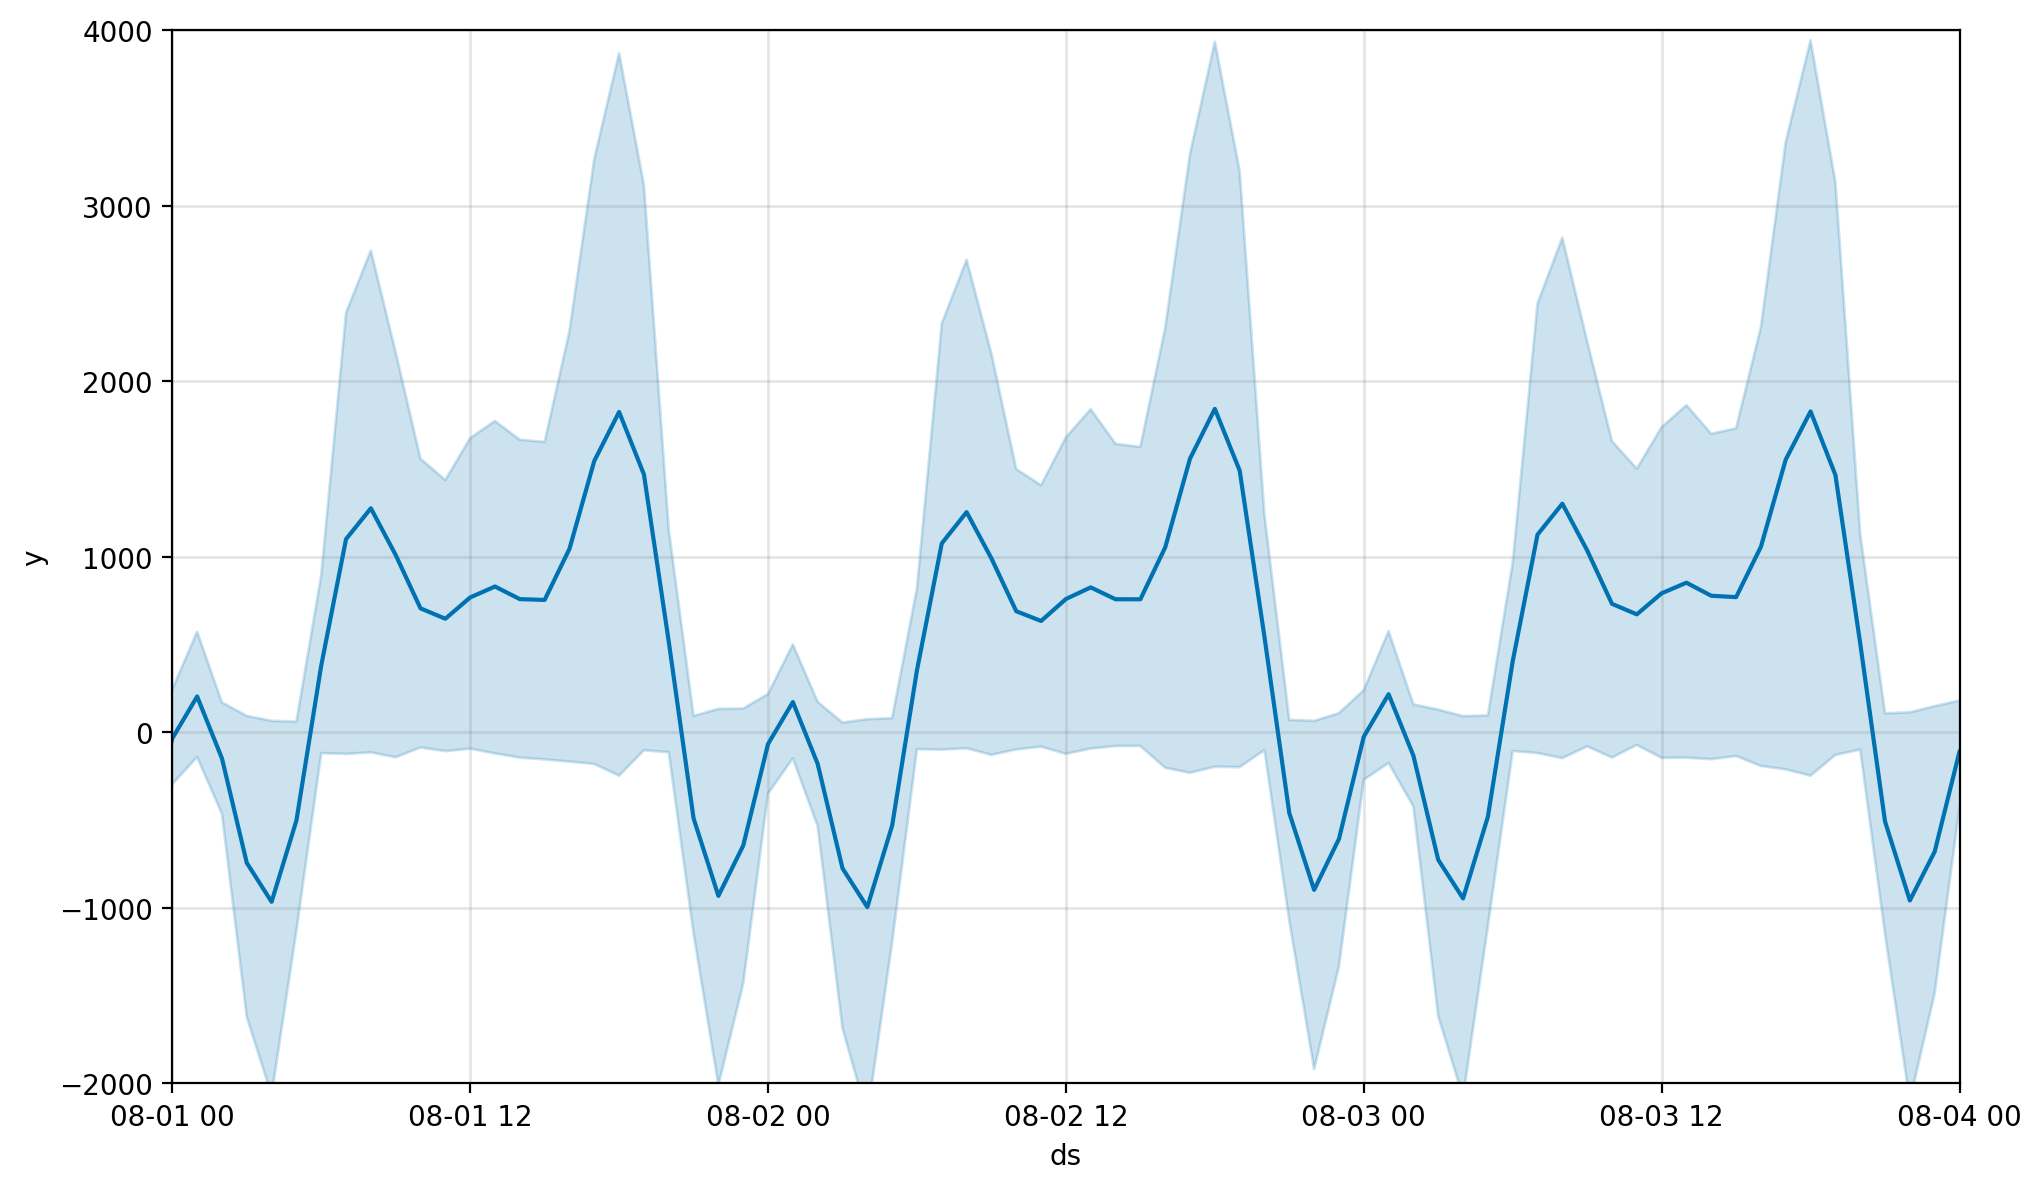

In [21]:
# увеличиваем масштаб
fig = model.plot(forecast)
plt.xlim(pd.to_datetime(['2018-08-01', '2018-08-04']))
plt.ylim(-2000, 4000)
plt.show()

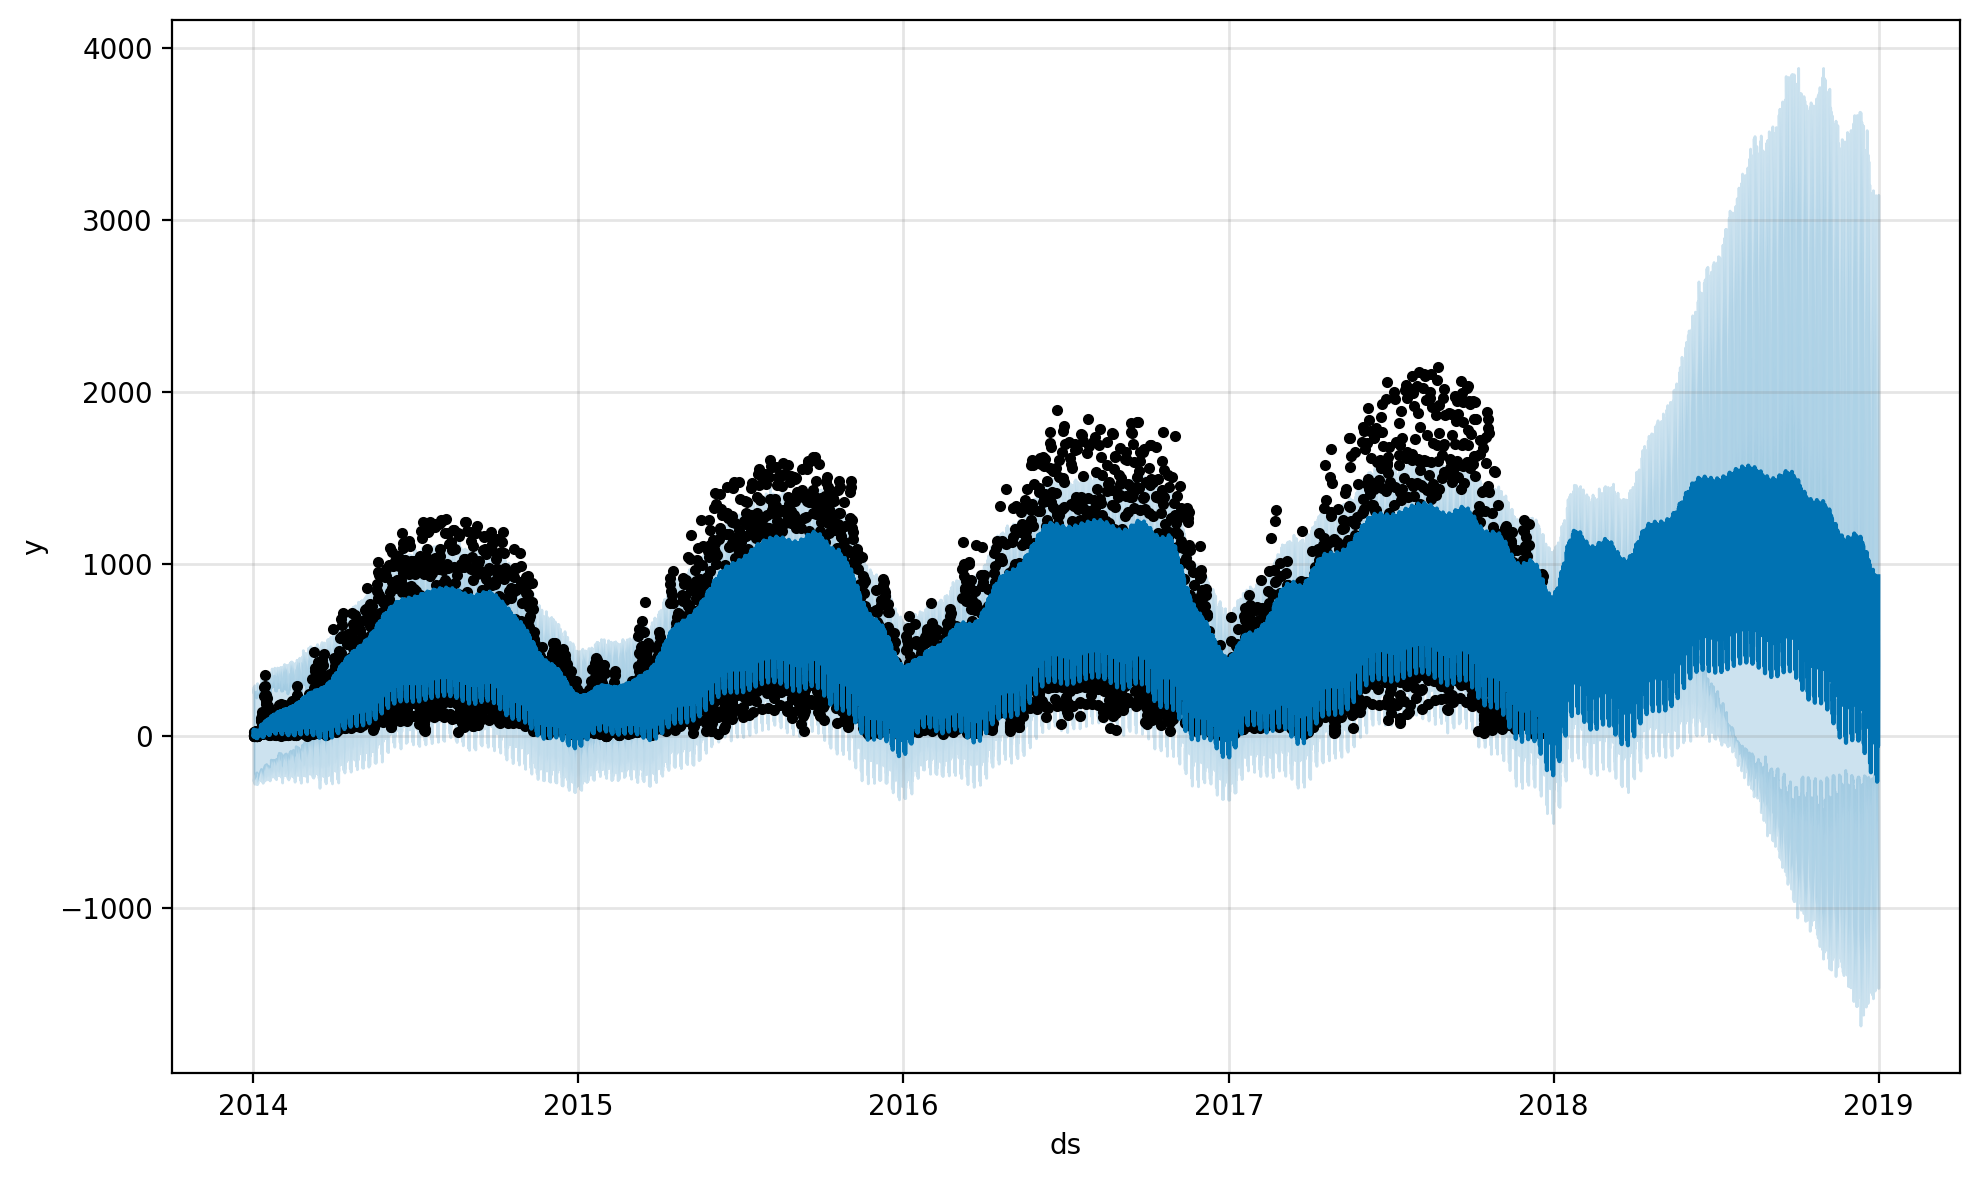

In [22]:
# модифицируем датафрейм future
future2 = future[(future['ds'].dt.hour >= 8) &
                 (future['ds'].dt.hour < 18)]
# получаем и визуализируем прогнозы
forecast2 = model.predict(future2)
fig = model.plot(forecast2)
plt.show()

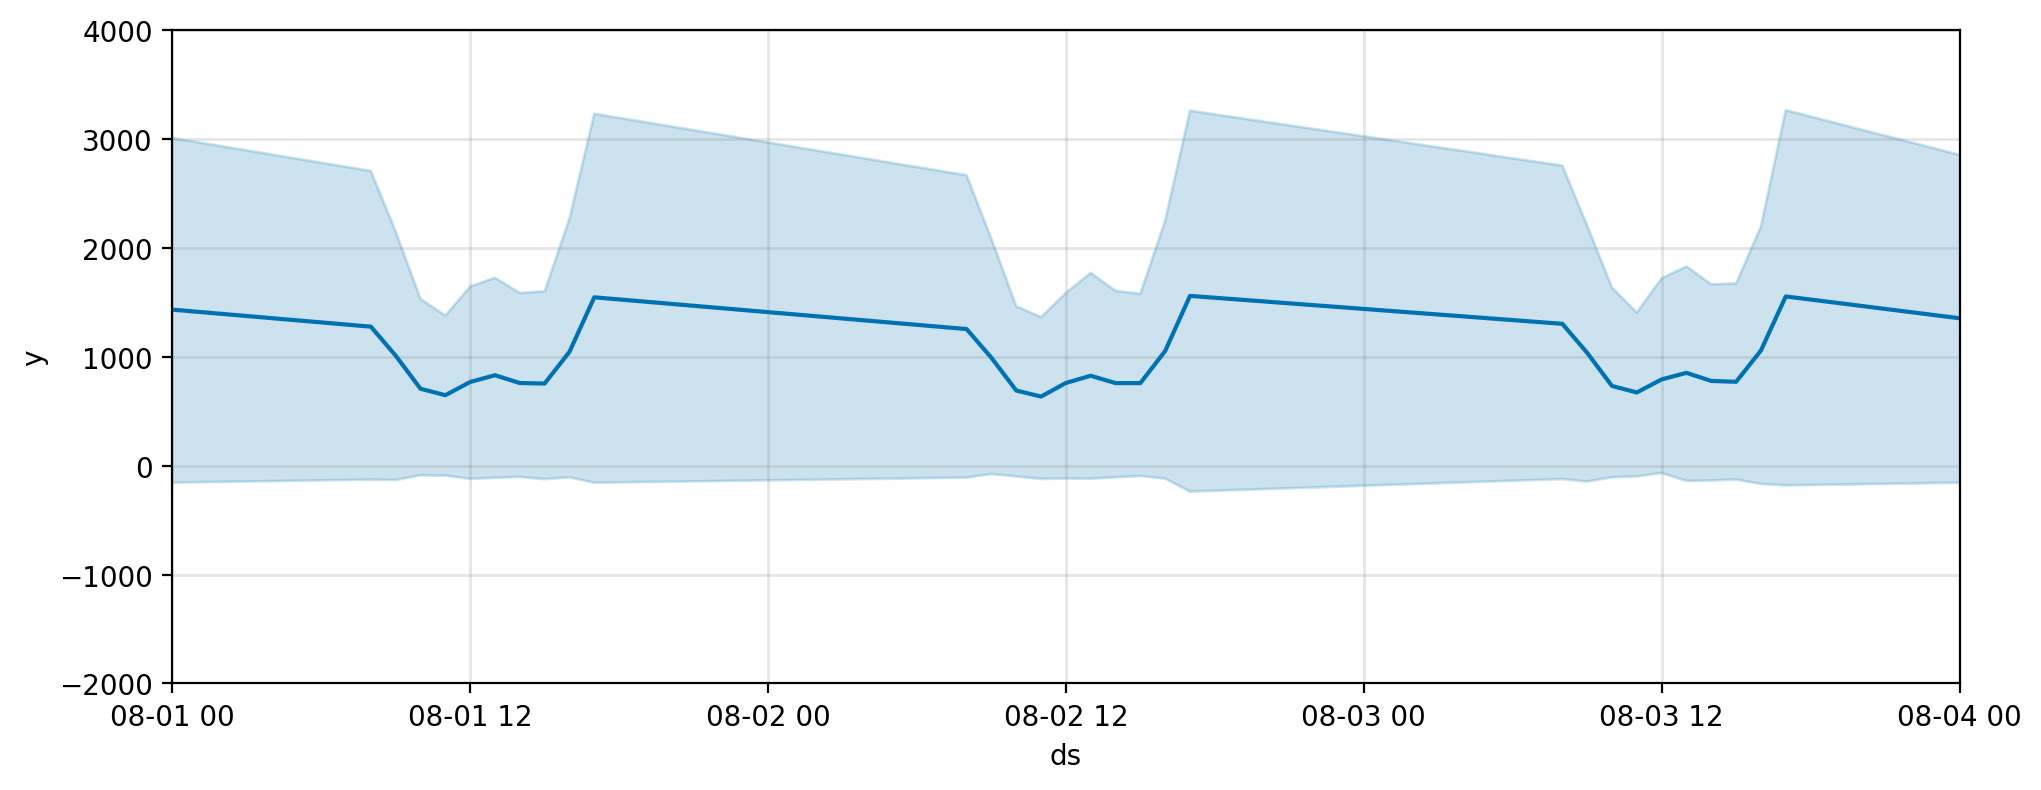

In [23]:
# увеличиваем масштаб
fig = model.plot(forecast2, figsize=(10, 4))
plt.xlim(pd.to_datetime(['2018-08-01', '2018-08-04']))
plt.ylim(-2000, 4000)
plt.show()

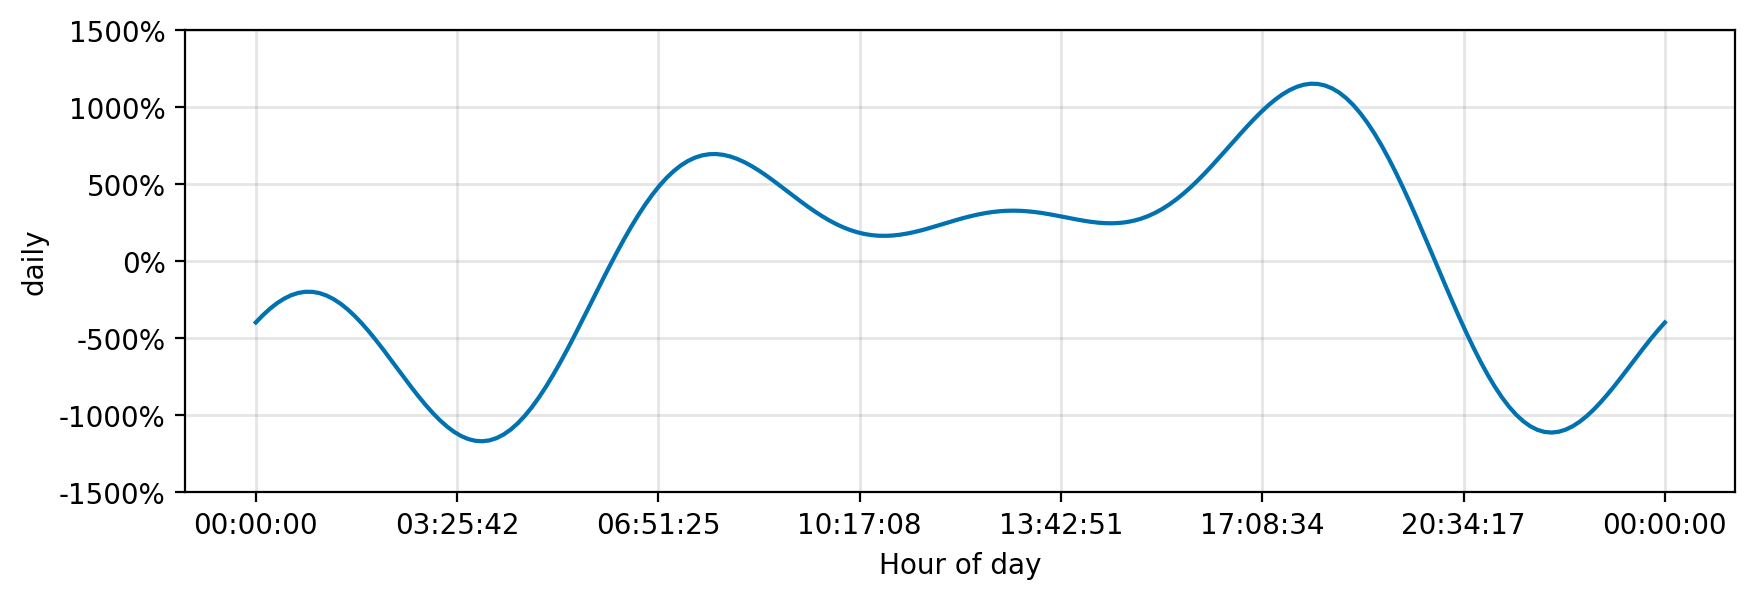

In [24]:
# импортируем функцию plot_seasonality()
from prophet.plot import plot_seasonality
# строим график дневной сезонности
plot_seasonality(model, 'daily', figsize=(10, 3))
plt.show()